In [40]:
# Importing libraries
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

In [91]:
# Defining Feature Engineering functions 
def zero_encoder(x):
    return (x == 0).astype(int)
Zero_Encoder = FunctionTransformer(zero_encoder)

def time_encoder(x):
    return np.array(x.iloc[:,0].dt.hour)[:, np.newaxis]
Time_Encoder = FunctionTransformer(time_encoder)

def log_transformer(x):
    return np.log(x+10**-10) #Constant added to prevent log 0
Log_Transformer = FunctionTransformer(log_transformer)

# Importing preprocessor for feature engineering
with open('preprocessors/preprocessor_set_2', 'rb') as file:
    preprocessor = pickle.load(file)

In [92]:
# Importing test data
X_df_raw = pd.read_csv("/workspace/anomaly_lte/data/X_test_100rows.csv")

# Adding Index
X_df_raw.insert(0, 'Unnamed: 0', np.arange(0, 101, 1))

# Turning time into a datetime type
X_df_raw['Time'] = pd.to_datetime(X_df_raw['Time'], format = '%H:%M')

# Creating new columns for meanUE_UL_encoded and meanUE_DL_encoded 
X_df_raw['meanUE_UL_encoded'] = X_df_raw['meanUE_UL']
X_df_raw['meanUE_DL_encoded'] = X_df_raw['meanUE_DL']

# Feature engineering
X_df = preprocessor.transform(X_df_raw)
X_df = pd.DataFrame(X_df)

# Creating new column names
Columns = ['CellName_7VLTE', 'CellName_5ALTE', 'CellName_10ALTE', 'CellName_9BLTE', 'CellName_7BLTE', 'CellName_3BLTE', 
'CellName_5BLTE', 'CellName_9ALTE', 'CellName_10CLTE', 'CellName_7ULTE', 'CellName_6ULTE', 'CellName_1BLTE', 
'CellName_2ALTE', 'CellName_7ALTE', 'CellName_8ALTE', 'CellName_6ALTE', 'CellName_3CLTE', 'CellName_6CLTE', 
'CellName_10BLTE', 'CellName_6WLTE', 'CellName_8CLTE', 'CellName_3ALTE', 'CellName_4CLTE', 'CellName_4BLTE', 
'CellName_7WLTE', 'CellName_6VLTE', 'CellName_1ALTE', 'CellName_7CLTE', 'CellName_4ALTE', 'CellName_1CLTE', 
'CellName_8BLTE', 'CellName_5CLTE', 'CellName_6BLTE', 'Time', 'meanUE_UL_encoded', 'meanUE_DL_encoded', 'PRBUsageUL', 
'PRBUsageDL', 'meanThr_DL', 'meanThr_UL', 'maxThr_DL', 'maxThr_UL', 'meanUE_DL', 'meanUE_UL', 'maxUE_DL', 'maxUE_UL', 
'maxUE_UL+DL', 'Outdated Index']

X_df.columns = Columns

# Dropping index
X_df.drop(X_df.columns[[-1]], axis = 1, inplace = True)

In [82]:
# Importing decision tree model
with open('models/train_xgboost_ft2.pkl', 'rb') as model_file:
    xgboost = pickle.load(model_file)

with open('models/train_dtree_ft2.pkl', 'rb') as model_file:
    dtree = pickle.load(model_file)

In [87]:
# Setting up SHAP explainer
explainer = shap.TreeExplainer(xgboost, X_df)
shap_values = explainer.shap_values(X_df)

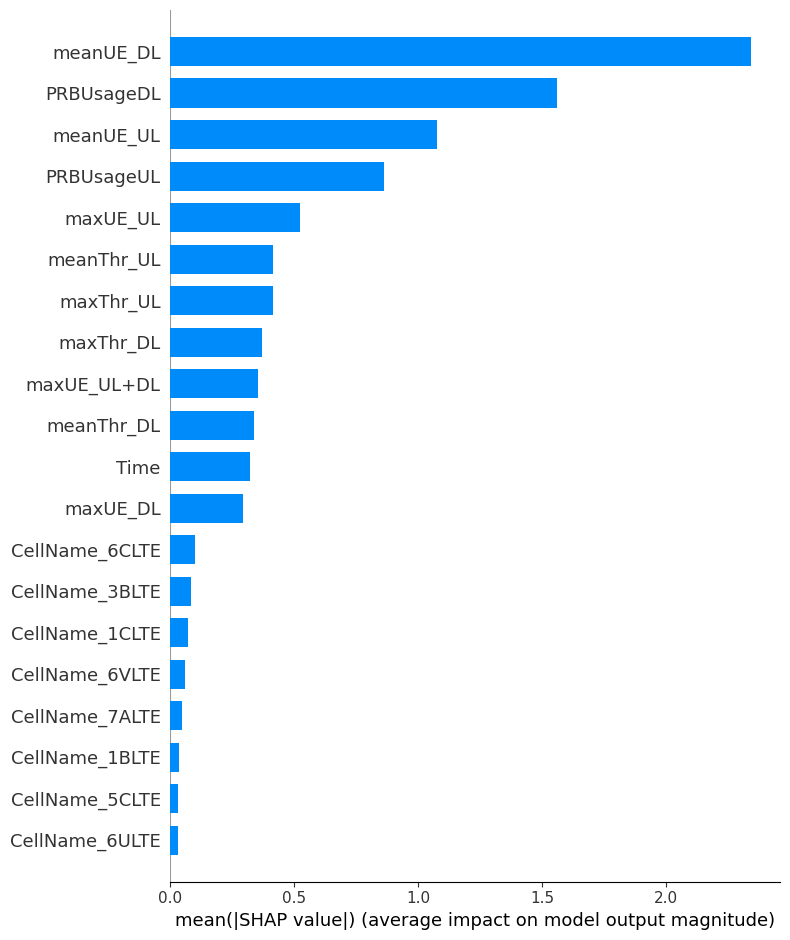

In [88]:
# Plotting Summary plot
shap.summary_plot(shap_values, X_df, plot_type='bar', class_names=['Normal', 'Anomalous'])
plt.show()
